# Telecom Customer Churn Analysis

The dataset used for this analysis has been taken from **Kaggle**.  
It contains detailed information about telecom customers, including their demographics, subscription plans, and churn status.

🔗To see the dataset on Kaggle, [click here](https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn/data)

## Project Objectives

The main objectives of this project are:

- To identify the key factors that influence customer churn in the telecom sector.  
- To analyze which customer groups are more likely to churn.  
- To study how different attributes (such as contract type, tenure, monthly charges, and support services) affect churn.  
- To provide insights that can help telecom companies improve customer retention strategies.  

## Step-1: Importing Libraries
To perform data analysis, we first import the required Python libraries.  
- **pandas** → for handling and analyzing data  
- **numpy** → for numerical operations  
- **matplotlib** and **seaborn** → for data visualization 

In [129]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step-2: Understanding the Dataset

In [132]:
# reading the csv file of customer churn
df = pd.read_csv(r"D:\Downloads\my projects\Customer Churn.csv")
# and then taking first five row to understand the data
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1.Dataset Summary
* Total records: 7043
* Total features (columns): 21
#### Features are-
 1. **customerID** – Unique ID for each customer
 2. **gender** – Gender of the customer (male / female)
 3. **SeniorCitizen** – Whether the customer is a senior citizen (0 = No, 1 = Yes)
 4. **Partner** – Whether the customer has a partner (Yes / No)
 5. **Dependents** – Whether the customer has dependents (Yes / No)
 6. **tenure** – Number of months the customer has stayed with the company
 7. **PhoneService** – Whether the customer has a phone service (Yes / No)
 8. **MultipleLines** – Whether the customer has multiple phone lines (Yes / No / No phone service)
 9. **InternetService** – Type of internet service (DSL / Fiber optic / No)
 10. **OnlineSecurity** – Whether the customer has online security (Yes / No / No internet service)
 11. **OnlineBackup** – Whether the customer has online backup (Yes / No / No internet service)
 12. **DeviceProtection** – Whether the customer has device protection (Yes / No / No internet service)
 13. **TechSupport** – Whether the customer has tech support (Yes / No / No internet service)
 14. **StreamingTV** – Whether the customer uses streaming TV (Yes / No / No internet service)
 15. **StreamingMovies** – Whether the customer uses streaming movies (Yes / No / No internet service)
 16. **Contract** – Type of contract (Month-to-month / One year / Two year)
 17. **PaperlessBilling** – Whether the customer uses paperless billing (Yes / No)
 18. **PaymentMethod** – Method of payment (Electronic check / Mailed check / Bank transfer / Credit card)
 19. **MonthlyCharges** – Monthly charges the customer pays (numeric)
 20. **TotalCharges** – Total charges paid by the customer (numeric, currently object type)
 21. **Churn** – Whether the customer has left the company (Yes / No)

The column **TotalCharges** is currently of object type. We will convert this in _float_ data type.

In [138]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [140]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### After checking the dataset, we find that there are no null values in any column.
This means our dataset is complete, and we don't need to handle missing data.

In [143]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [145]:
df["customerID"].duplicated().sum()

0

## Step-3: Exploratory Data Analysis (EDA)

Let's analyze the number of customers who have churned.
Here, we aim to find out how many customers have left the company versus those who stayed.

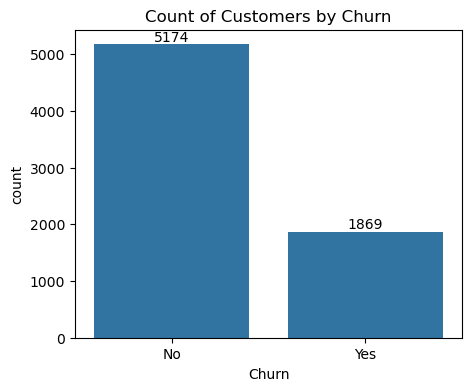

In [149]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

Now, let's visualize the proportion of customers who churned versus those who stayed using a pie chart.
This will help us understand the churn percentage in the overall customer base.


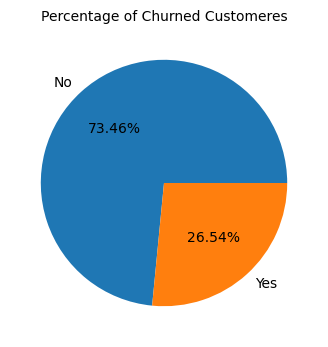

In [152]:
plt.figure(figsize = (5,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

Around 27% of customers have churned, while the majority (73%) stayed, indicating a relatively strong customer retention.

##### **Let's see if gender has any effect on churn.**
We'll use a count plot to compare male and female customers, and also see how many of each churned.

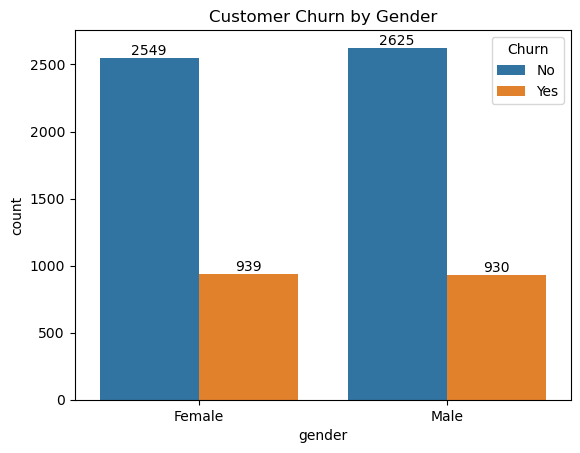

In [156]:
ax = sns.countplot(x = 'gender',data = df , hue = "Churn") 
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Customer Churn by Gender")
plt.show()

* Female churned customers: 939 out of 3488 total females → approx. 26.9%
* Male churned customers: 930 out of 3555 total males → approx. 26.2%

**Conclusion:** Customer churn appears to be nearly equal across genders, indicating that gender does not significantly influence churn behavior.

Alright, let's check if senior citizens are churning more or less compared to the rest of the customers.
First, let's make the data more readable by converting the numeric values of SeniorCitizen (0 and 1) into Yes and No.

In [173]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

 Alright, let's first see how many senior citizens we have in the dataset.
 This will give us an idea of how important it is to analyze this group separately.


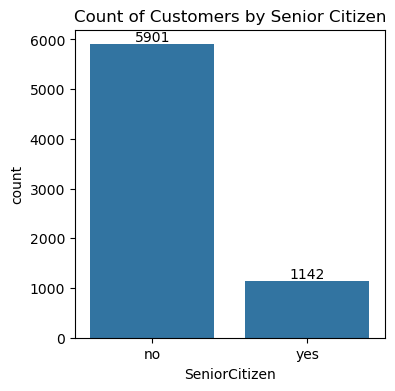

In [175]:

plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

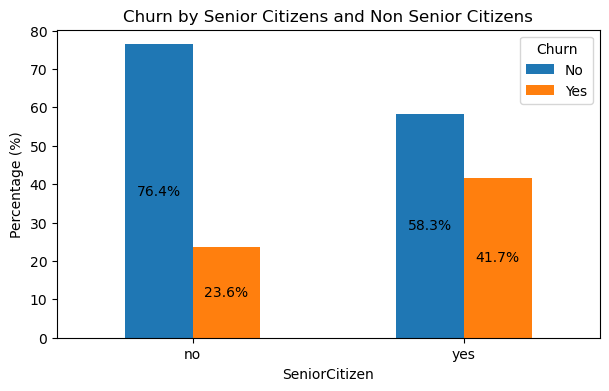

In [178]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(7, 4))
total_counts.plot(kind='bar',  ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x = p.get_x()
    ax.text(x + width / 2, height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizens and Non Senior Citizens')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn') 

plt.show()

* Churn rate for non-senior citizens: 23.6%
* Churn rate for senior citizens: 41.7%
  
**Conclusion:** Senior citizens are more likely to churn than non-senior citizens.

 Next, let's explore whether having a partner influences customer churn.

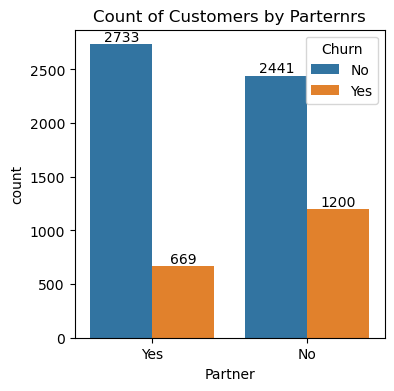

In [89]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Partner", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Parternrs")
plt.show()

**Conclusion:** Customers who don’t have partners are more likely to churn than those who do

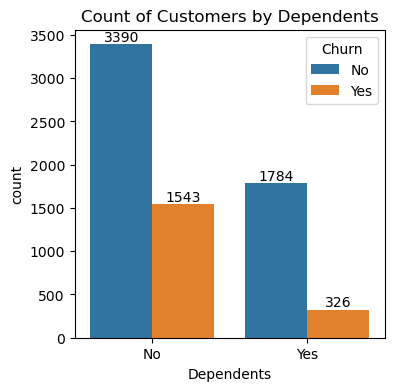

In [91]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Dependents", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Dependents")
plt.show()

**Conclusion:** Customers without dependents are more likely to churn than those with dependents.

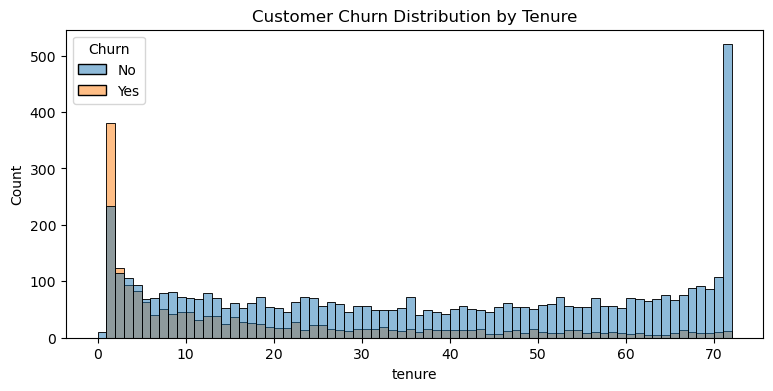

In [194]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.title("Customer Churn Distribution by Tenure")
plt.show()

* Customers with very low tenure (especially near 0 months) show a high churn rate.
* As tenure increases, churn decreases, indicating that long-term customers are more likely to stay.
  
**Insight:** Tenure is a strong indicator of customer loyalty—new customers are more at risk of churning.

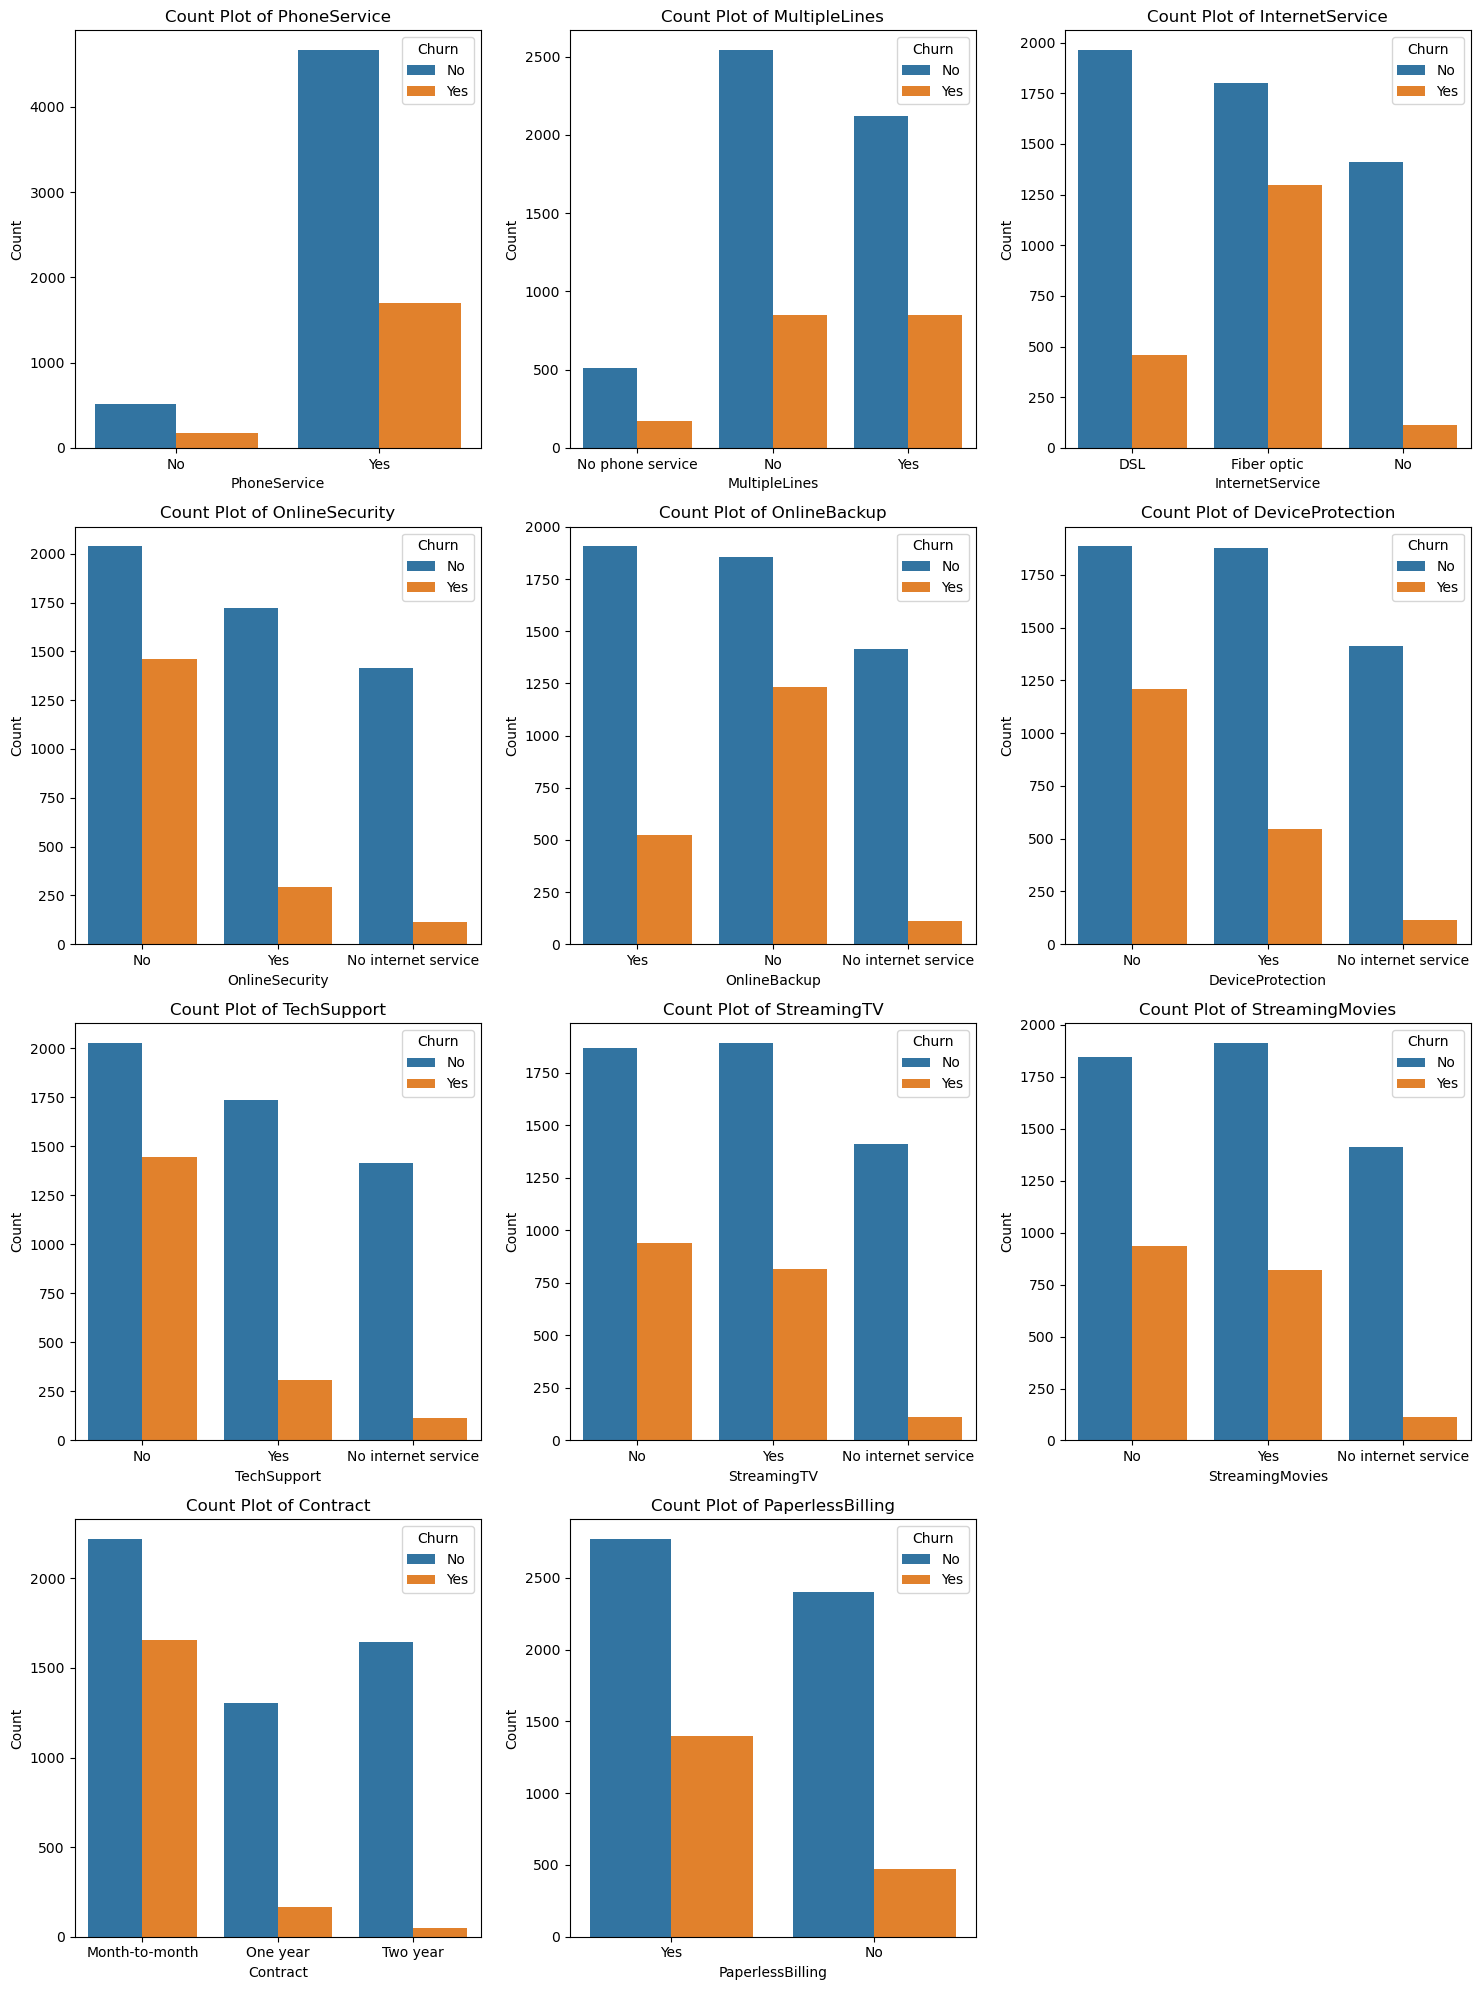

In [33]:

columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling']

fig, axes = plt.subplots(4, 3, figsize=(15,20))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Conclusion:
* **PhoneService:** Customers with phone service churn less than those without.
* **MultipleLines:** Having multiple lines slightly increases churn compared to single line users.
* **InternetService:** Fiber optic users show higher churn than DSL or no internet service users.
* **OnlineSecurity:** Customers without online security churn more.
* **OnlineBackup:** Lack of online backup is linked to higher churn.
* **DeviceProtection:** Customers without device protection churn more.
* **TechSupport:** Absence of tech support correlates with higher churn.
* **StreamingTV:** Streaming TV users churn more than non-users.
* **StreamingMovies:** Streaming movie users show higher churn.
* **Contract:** Month-to-month contracts have the highest churn; longer contracts reduce churn.
* **PaperlessBilling:** Customers with paperless billing churn more.

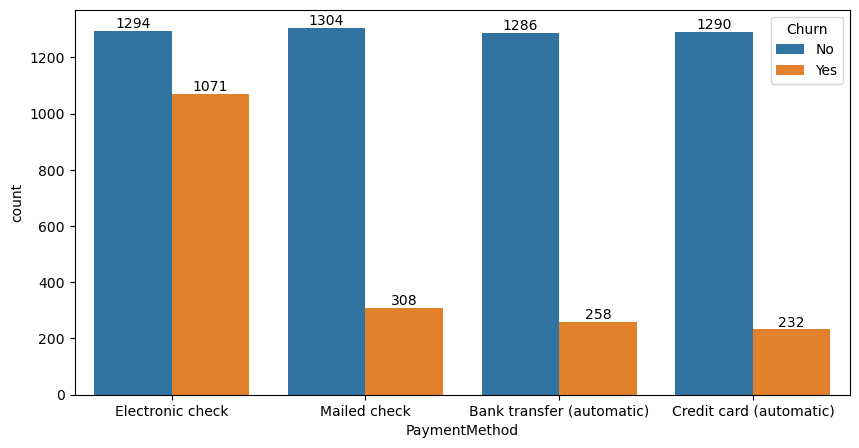

In [34]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'PaymentMethod',data = df , hue = "Churn") 
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()

**Conclusion:** Customers using electronic checks are more likely to churn, while automatic payment methods are linked to better retention.

## Key Findings

#### 1. Demographics & Personal Factors
* **Gender:** Churn is almost equal between male and female customers → Gender has minimal impact on churn.
* **Senior Citizens:** More likely to churn, with a churn rate of 41% compared to 26% for non-senior citizens.
* **Partner & Dependents:** Customers without partners or dependents exhibit higher churn rates (approximately double).

#### 2. Tenure (Customer Loyalty)
* New customers (low tenure): Higher risk of churn.
* Long-tenure customers: More loyal and less likely to churn.

#### 3. Services & Usage
* Phone Service: Customers with phone service churn less.
* Multiple Lines: Having multiple lines slightly increases churn.
* Internet Service: Fiber optic users churn more than DSL or no-internet users.
* Value-Added Services (Online Security, Backup, Device Protection, Tech Support): Lack of these services strongly correlates with higher churn.
* Streaming Services (TV & Movies): Streaming users show higher churn rates.

#### 4. Contracts & Billing
##### Contract Type:
* Month-to-month → Highest churn
* One-year / Two-year → Significantly lower churn
* Paperless Billing → Customers with paperless billing churn more

##### Payment Method:
* Electronic check users → Highest churn, almost triple the average of other payment methods
* Automatic methods (Bank transfer, Credit card) → Better retention


## Final Conclusion

#### High-Risk Customer Segments:
* Senior citizens
* Customers without partners/dependents
* New customers (low tenure)
* Fiber optic internet users
* Customers lacking online security, backup, device protection, or tech support
* Month-to-month contract users
* Paperless billing & electronic check payment users

## Recommendations & Suggestions
* To reduce churn and improve retention, the company should:
  
##### 1. Promote Long-Term Contracts
Offer discounts or loyalty rewards for 1-year and 2-year contracts.

##### 2. Bundle Value-Added Services
Provide affordable packages including online security, backup, device protection, and tech support.

##### 3. Target High-Risk Groups
Run personalized retention campaigns for senior citizens, new customers, and fiber optic users.

##### 4. Encourage Auto-Pay Methods
Give incentives (e.g., cashback, discounts) for customers who switch from electronic checks to auto-pay methods.

##### 5. Improve Onboarding for New Customers
Provide welcome offers, tutorials, and proactive support in the first 3–6 months to reduce early churn.

##### 6. Reassess Streaming Service Strategy
Since streaming users churn more, consider offering bundled streaming discounts or exclusive content to increase stickiness.